# Tutorial - Getting Started

Carlo for Ezra - 30 March 2022

Quick intro to the analysis of XENON data

In [1]:
# Always good to understand which python we are running
# Ideally we want to have /data/xenon/anaconda3/envs/strax/bin/python that we activated in the barshrc file

!which python

/data/xenon/joranang/anaconda/envs/amstrax_2021/bin/python


In [2]:
# Import some relevan packages

import pandas as pd # this is used for the dataframes
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime


## We will work with BiPo events

What are they? 

#### This is the dataframe with my BiPo selected data

It is saved as an hdf5 file, they can be very useful to load a lot of data <br />
There are ~36k events, of which ~7k are pure beta events. You can select pure beta events by the columns 'cut_bi_po_214_beta'. 
The dataframe has a lot of columns, you don't need most of them. I'll try to explain you. 


In [3]:
df = pd.read_hdf('/user/cfuselli/xenon/cfuselli/carlo_for_ezra/bipo_selection_global_v7_linfit.h5')
df = df[df['bi_cs2']>0]
df

,run_id,time,endtime,cut_bi_po_214_beta,bi_cs1,bi_cs1_wo_timecorr,bi_cs2_wo_elifecorr,bi_cs2_wo_timecorr,bi_cs2_area_fraction_top,bi_cs2_bottom,...,s2_x_linfit_5,s2_y_linfit_5,s2_x_linfit_6,s2_y_linfit_6,s2_x_linfit_7,s2_y_linfit_7,s2_x_linfit_8,s2_y_linfit_8,s2_x_linfit_9,s2_y_linfit_9
0,031562,1636057241473515106,1636057241477180260,False,16471.400391,16471.400391,6.026108e+05,6.397130e+05,0.753255,158252.984375,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,031562,1636057428219394196,1636057428222613430,False,19674.134766,19674.134766,4.796941e+05,4.956168e+05,0.757871,120312.625000,...,-10.155602,57.014702,-12.931456,59.106789,-11.187488,58.376419,0.0,0.0,0.0,0.0
2,031562,1636057614420300806,1636057614423296780,False,16224.701172,16224.701172,1.513149e+05,1.536910e+05,0.752416,38149.558594,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,031563,1636058714489217116,1636058714493678020,False,21082.535156,21082.535156,1.312246e+06,1.469467e+06,0.754826,360703.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
8,031563,1636058919807995876,1636058919811634730,False,18941.851562,18941.851562,3.236846e+05,3.376313e+05,0.755237,82738.093750,...,41.802109,16.963675,-19.956142,-26.359236,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36054,025224,1625951813844999406,1625951813848631090,True,2591.160156,2591.160156,8.449034e+04,9.227123e+04,0.747939,23300.607422,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
36055,025224,1625952051263905286,1625952051267165440,False,15766.400391,15766.400391,4.597683e+04,4.847616e+04,0.750559,12114.095703,...,7.044025,16.554157,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
36056,025224,1625952176754673926,1625952176757635940,False,17270.701172,17270.701172,2.179990e+05,2.353788e+05,0.754418,57910.636719,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
36057,025224,1625952193605721266,1625952193608694830,False,19315.257812,19315.257812,3.911802e+05,4.051646e+05,0.752358,100519.687500,...,-0.851714,-4.898996,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


This is how you can select the pure beta events

In [4]:
pure_beta = df[df['cut_bi_po_214_beta']]
pure_beta

,run_id,time,endtime,cut_bi_po_214_beta,bi_cs1,bi_cs1_wo_timecorr,bi_cs2_wo_elifecorr,bi_cs2_wo_timecorr,bi_cs2_area_fraction_top,bi_cs2_bottom,...,s2_x_linfit_5,s2_y_linfit_5,s2_x_linfit_6,s2_y_linfit_6,s2_x_linfit_7,s2_y_linfit_7,s2_x_linfit_8,s2_y_linfit_8,s2_x_linfit_9,s2_y_linfit_9
10,031563,1636059087749466976,1636059087752791680,True,5077.108887,5077.108887,2.741669e+05,2.814883e+05,0.749617,70563.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,031563,1636059087764394026,1636059087767787340,True,12138.738281,12138.738281,9.754455e+05,1.014487e+06,0.751753,252142.671875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,031564,1636061257746040656,1636061257749904980,True,4997.391602,4997.391602,3.090298e+05,3.317338e+05,0.754024,81955.695312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,031564,1636061469574041956,1636061469576921720,True,8763.799805,8763.799805,7.348535e+05,7.388052e+05,0.753586,182848.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,031564,1636061481194613536,1636061481198982880,True,15918.944336,15918.944336,1.133908e+06,1.257372e+06,0.751151,314265.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36044,025224,1625950246327305656,1625950246331617890,True,8084.457031,8084.457031,5.347777e+05,6.238479e+05,0.748046,157468.843750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36047,025224,1625951038327771756,1625951038331667300,True,11043.847656,11043.847656,4.551150e+05,5.099632e+05,0.750049,127699.234375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36053,025224,1625951441994796526,1625951441997761990,True,11997.137695,11997.137695,9.507484e+05,1.111357e+06,0.754986,272797.187500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36054,025224,1625951813844999406,1625951813848631090,True,2591.160156,2591.160156,8.449034e+04,9.227123e+04,0.747939,23300.607422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So many columns, most of them are irrelevant

We mainly care about columns that say something about Bi and Po. You can ask me about the meaning of the columns. Some of them are standard things. Others is stuff that I made myself.. 

Plus some others... we'll see

Anyway, you can find here the description of the main columns of the events data:

https://straxen.readthedocs.io/en/latest/reference/datastructure_nT.html

It's the documentation of straxen, the analysis software we use in XENON. Very useful. 

You need to understand the difference between peaks and events. The dataframe I gave you is a bit of a mix, it is an event-like structure but contains a lot of information of the single peaks of an event. 

In [5]:
# List here all columns about bi or po

for val in df.columns[df.columns.str.contains('bi') | df.columns.str.contains('po')]:
    print(val)

cut_bi_po_214_beta
bi_cs1
bi_cs1_wo_timecorr
bi_cs2_wo_elifecorr
bi_cs2_wo_timecorr
bi_cs2_area_fraction_top
bi_cs2_bottom
bi_cs2
po_cs1
po_cs1_wo_timecorr
po_cs2_wo_elifecorr
po_cs2_wo_timecorr
po_cs2_area_fraction_top
po_cs2_bottom
po_cs2
s2_bi_match
s2_po_match
s2_time_bi
s2_center_time_bi
s2_endtime_bi
s2_area_bi
s2_n_channels_bi
s2_n_competing_bi
s2_max_pmt_bi
s2_max_pmt_area_bi
s2_range_50p_area_bi
s2_range_90p_area_bi
s2_rise_time_bi
s2_area_fraction_top_bi
s2_time_po
s2_center_time_po
s2_endtime_po
s2_area_po
s2_n_channels_po
s2_n_competing_po
s2_max_pmt_po
s2_max_pmt_area_po
s2_range_50p_area_po
s2_range_90p_area_po
s2_rise_time_po
s2_area_fraction_top_po
s2_x_cnn_bi
s2_y_cnn_bi
s2_x_cnn_po
s2_y_cnn_po
s2_r_cnn_bi
s2_r_cnn_po
s2_deltar_cnn_bipo
s2_distance_cnn_bipo
s2_x_gcn_bi
s2_y_gcn_bi
s2_x_gcn_po
s2_y_gcn_po
s2_r_gcn_bi
s2_r_gcn_po
s2_deltar_gcn_bipo
s2_distance_gcn_bipo
s2_x_mlp_bi
s2_y_mlp_bi
s2_x_mlp_po
s2_y_mlp_po
s2_r_mlp_bi
s2_r_mlp_po
s2_deltar_mlp_bipo
s2_distance_

It's important to remember that what defines an event is its time (it's in nanoseconds)!

In [6]:
df.filter(['time', 'endtime'])

,time,endtime
0,1636057241473515106,1636057241477180260
1,1636057428219394196,1636057428222613430
2,1636057614420300806,1636057614423296780
6,1636058714489217116,1636058714493678020
8,1636058919807995876,1636058919811634730
...,...,...
36054,1625951813844999406,1625951813848631090
36055,1625952051263905286,1625952051267165440
36056,1625952176754673926,1625952176757635940
36057,1625952193605721266,1625952193608694830


## Let's look at some data

Let's look at the distribution of the areas of the bismuth and the polonium. 

There's a lot to understand here. What is S1 and S2. What is the area? What is corrected area S1 and S2? How do we do these corrections? How do uncorrected data looks like? What is the unit PE? Which shape do we expect for the beta? Which for the alpha? What makes the distribution of all the events so different from the one of beta only? What defines the spread of the peaks? What does the area depend on? 

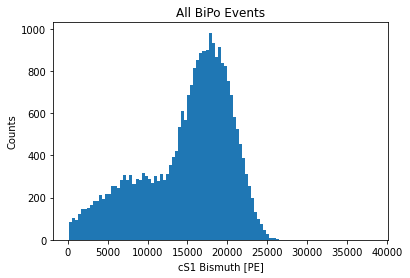

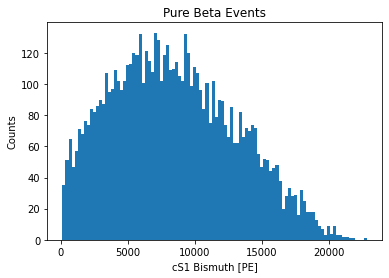

In [7]:
plt.hist(df['bi_cs1'], bins=100)
plt.xlabel('cS1 Bismuth [PE]')
plt.ylabel('Counts')
plt.title('All BiPo Events')
plt.show()

plt.hist(pure_beta['bi_cs1'], bins=100)
plt.xlabel('cS1 Bismuth [PE]')
plt.ylabel('Counts')
plt.title('Pure Beta Events')
plt.show()

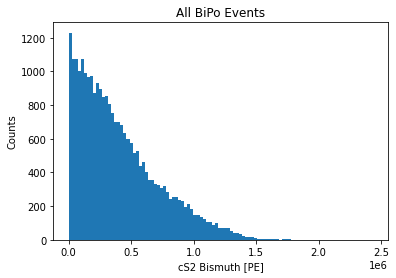

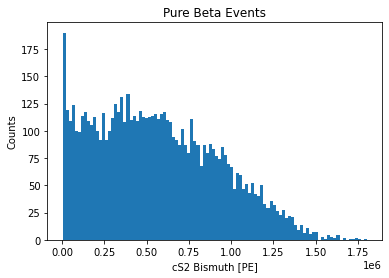

In [8]:
plt.hist(df['bi_cs2'], bins=100)
plt.xlabel('cS2 Bismuth [PE]')
plt.ylabel('Counts')
plt.title('All BiPo Events')
plt.show()

plt.hist(pure_beta['bi_cs2'], bins=100)
plt.xlabel('cS2 Bismuth [PE]')
plt.ylabel('Counts')
plt.title('Pure Beta Events')
plt.show()

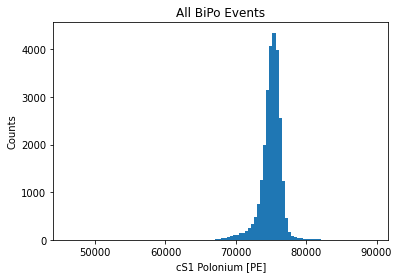

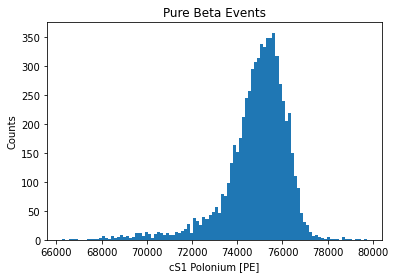

In [9]:
plt.hist(df['po_cs1'], bins=100)
plt.xlabel('cS1 Polonium [PE]')
plt.ylabel('Counts')
plt.title('All BiPo Events')
plt.show()

plt.hist(pure_beta['po_cs1'], bins=100)
plt.xlabel('cS1 Polonium [PE]')
plt.ylabel('Counts')
plt.title('Pure Beta Events')
plt.show()

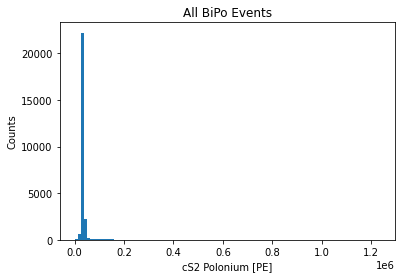

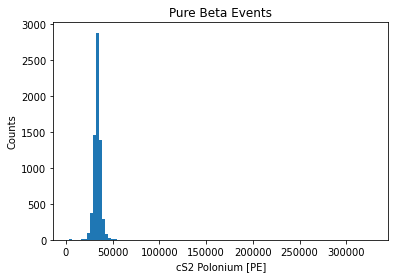

In [10]:
plt.hist(df['po_cs2'], bins=100)
plt.xlabel('cS2 Polonium [PE]')
plt.ylabel('Counts')
plt.title('All BiPo Events')
plt.show()

plt.hist(pure_beta['po_cs2'], bins=100)
plt.xlabel('cS2 Polonium [PE]')
plt.ylabel('Counts')
plt.title('Pure Beta Events')
plt.show()

## Let's take a look at the positions

How does position reconstruction works 

We have 3 main methods to do that. They are Neural Networks. The positions for the events are already computed for us with the NNs that were trained with simulations. 

The names of the NNs are: MLP, CNN and GCN. They are just different kinds of NNs. 

The extra method is called LinPosFit and Auke-Pieter did it. It's a Linearised LogLikelihood fit. You'll look into it in detail. 

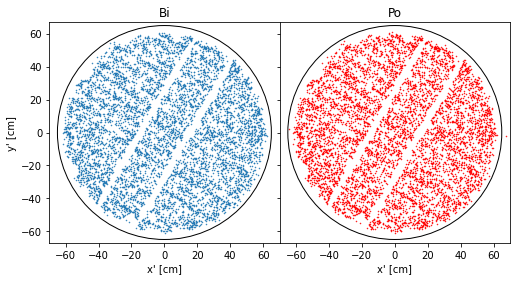

In [11]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(8,4))
fig.subplots_adjust(.1,.1,.9,.9,0,0)

alg_name = 'linfit' # other options are mlp, cnn, gcn

# Here we get the x and y positions for every event for the bismuth and the polonium
bx, by = pure_beta['s2_x_'+alg_name+'_bi'], pure_beta['s2_y_'+alg_name+'_bi']
px, py = pure_beta['s2_x_'+alg_name+'_po'], pure_beta['s2_y_'+alg_name+'_po']


axes[0].scatter(bx, by, label='Bi', marker='.', s=1)
axes[0].set_xlabel("x' [cm]")
axes[0].set_ylabel("y' [cm]")
axes[0].set_title('Bi')
axes[0].set_xlim(-70,70)
axes[1].scatter(px, py, label='Po', marker='.', s=1, color='red')
axes[1].set_xlim(-70,70)
plt.xlabel("x' [cm]")
plt.title('Po')
circle2 = plt.Circle((0, 0), 65, color='k', fill=False, lw=1)
axes[0].add_patch(circle2)
circle2 = plt.Circle((0, 0), 65, color='k', fill=False, lw=1)
axes[1].add_patch(circle2)

axes[0].set_aspect('equal')
axes[1].set_aspect('equal') 

## Straxen

This is the analysis software that we use in the collaboration. 

You will not need it often, but it's useful for some things like getitng the positions of the PMTs. 

In [12]:
import straxen
import strax

straxen.print_versions()

2022-04-25 15:49:29,852 - utilix - WARNING - Could not load a configuration file. You can create one at /user/edecleen/.xenon_config, or set a custom path using

export XENON_CONFIG=path/to/your/config



cutax is not installed
Working on stbc-i2.nikhef.nl with the following versions and installation paths:
python	v3.8.12	(default, Oct 12 2021, 13:49:34) [GCC 7.5.0]
strax	v1.1.2	/data/xenon/xamsl/software/strax/strax	git branch:master | 202477c
straxen	v1.1.3	/data/xenon/xamsl/software/straxen/straxen	git branch:master | 20dea98


In [13]:
pmt_pos = straxen.pmt_positions()
pmt_pos


,i,array,x,y
0,0,top,-13.875300,-64.0872
1,1,top,-20.812900,-60.0818
2,2,top,-27.750600,-56.0763
3,3,top,-34.688200,-52.0709
4,4,top,-41.625900,-48.0654
...,...,...,...,...
489,489,bottom,0.000017,64.0872
490,490,bottom,41.625900,48.0654
491,491,bottom,34.688200,52.0709
492,492,bottom,27.750600,56.0763


There's a lot of nice functions from straxen that you can make use of

You find some here https://github.com/XENONnT/straxen/blob/master/straxen/matplotlib_utils.py

## LinPosFit

What is it? 

You should make your own version of the folder LinPosFit and copy it somewhere. So that you can play with it and modify it as you want. You can clone it from GitHub, if you don't know how to use it it's nice to learn. 


In [14]:
# Why do we need to do this to import LinPosFit?
import sys
import importlib
sys.path.insert(0,'/data/xenon/edecleen/carlo_for_ezra/LinPosFit/LinPosFit')
print(sys.path)
import LinPosFit
from LinPosFit import *
importlib.reload(LinPosFit)

LinPosFit.__file__

['/data/xenon/edecleen/carlo_for_ezra/LinPosFit/LinPosFit', '/data/xenon/edecleen/carlo_for_ezra', '/data/xenon/joranang/anaconda/envs/amstrax_2021/lib/python3.8/site-packages/git/ext/gitdb', '/data/xenon/joranang/anaconda/envs/amstrax_2021/lib/python38.zip', '/data/xenon/joranang/anaconda/envs/amstrax_2021/lib/python3.8', '/data/xenon/joranang/anaconda/envs/amstrax_2021/lib/python3.8/lib-dynload', '', '/user/edecleen/.local/lib/python3.8/site-packages', '/data/xenon/joranang/anaconda/envs/amstrax_2021/lib/python3.8/site-packages', '/data/xenon/xamsl/software/strax', '/data/xenon/xamsl/software/straxen', '/data/xenon/xamsl/software/amstrax', '/data/xenon/joranang/anaconda/envs/amstrax_2021/lib/python3.8/site-packages/IPython/extensions', '/user/edecleen/.ipython', '/data/xenon/joranang/anaconda/envs/amstrax_2021/lib/python3.8/site-packages/gitdb/ext/smmap']


'/data/xenon/edecleen/carlo_for_ezra/LinPosFit/LinPosFit/LinPosFit.py'

In [15]:
inch = 2.54 # cm
import straxen
import numpy as np
pmt_surface=(3.31)**2 *np.pi 


pmt_to_lxe = 7.0
npmt_top_array = 253 #494

pmt_pos = straxen.pmt_positions()
pmt_pos  = list(zip(pmt_pos['x'].values,pmt_pos['y'].values,np.repeat(pmt_to_lxe, npmt_top_array)))

In [16]:
# This is fake data. I will provide you with real data soon. 

import h5py
filename =  '/data/xenon/xenonnt_mc/posrec_patterns/S2s/patterns/S2_2000002/S2_2000002_0000.hdf5'
filename =  '/data/xenon/cfuselli/carlo_for_ezra/bi_po_area_per_channel.h5'

file = h5py.File(filename,"r")  

df_area_per_channel = file['df'][:]
df_area_per_channel['time']

len(df_area_per_channel)



36060

In [17]:
# we want to select only the pure beta events
df_area_per_channel = df_area_per_channel[np.isin(df_area_per_channel['time'], pure_beta['time'])]
df_area_per_channel['time']

df_area_per_channel['s2_area_per_channel_po']


array([[43.590515 , 57.40377  , 38.133564 , ..., 30.847097 , 21.978294 ,
        32.341663 ],
       [12.086846 , 15.156598 , 11.761831 , ..., 36.014645 , 32.14841  ,
        22.515947 ],
       [64.499344 , 57.659126 , 70.26121  , ..., 38.35854  , 29.274141 ,
        33.61367  ],
       ...,
       [17.806713 ,  6.4728174,  6.3629327, ..., 35.02971  , 27.753626 ,
        43.701237 ],
       [ 9.45643  , 15.463693 , 12.145232 , ..., 31.754272 , 23.3006   ,
        21.74923  ],
       [12.481362 , 16.137022 , 17.705965 , ..., 40.490192 , 29.660212 ,
        36.760433 ]], dtype=float32)

In [18]:
%%time 

import importlib
import pandas as pd
import math



res_bi=np.zeros(len(df_area_per_channel),dtype=[('x_bi_ezra',np.float),
                                             ('y_bi_ezra',np.float),
                                             ('r0_bi_ezra',np.float), 
                                             ('gamma_bi_ezra', np.float),
                                             ('logl_bi_ezra',np.float), 
                                             ('n_bi_ezra',np.int), 
                                             ('x00_bi_ezra',np.float),
                                             ('y00_bi_ezra',np.float),
                                             ('idx_bi_ezra',np.int),
                                             ('R_bi_ez',np.float)])
                                            

res_po=np.zeros(len(df_area_per_channel),dtype=[('x_po_ezra',np.float),
                                             ('y_po_ezra',np.float),
                                             ('r0_po_ezra',np.float), 
                                             ('gamma_po_ezra', np.float),
                                             ('logl_po_ezra',np.float), 
                                             ('n_po_ezra',np.int), 
                                             ('x00_po_ezra',np.float),
                                             ('y00_po_ezra',np.float),
                                             ('idx_po_ezra',np.int),
                                             ('R_po_ez',np.float)])
                                           
res_delta=np.zeros(len(df_area_per_channel),dtype=[ ('x_ezra',np.float),
                                                    ('y_ezra',np.float),
                                                    ('r0_ezra',np.float)])
                                            

    
    
    
display = False

number_of_events = len(df_area_per_channel)


for ip in range(number_of_events):
    
    nhit_bi = df_area_per_channel['s2_area_per_channel_bi'][ip][:npmt_top_array]
    nhit_po = df_area_per_channel['s2_area_per_channel_po'][ip][:npmt_top_array]
    

    # This lpf_ececute function is defined in the LinPosFit package. 
    # You need to study what it does. 
    
    
    fit_result_bi, xiter_bi, used_hits_bi = LinPosFit.lpf_execute(pmt_pos,nhit_bi,pmt_surface)
    fit_result_po, xiter_po, used_hits_po = LinPosFit.lpf_execute(pmt_pos,nhit_po,pmt_surface)
    
    
    
    res_bi[ip]['idx_bi_ezra'] = ip
    res_bi[ip]['x_bi_ezra'] = fit_result_bi[0]
    res_bi[ip]['y_bi_ezra'] = fit_result_bi[1]
    res_bi[ip]['r0_bi_ezra'] = fit_result_bi[2]
    res_bi[ip]['logl_bi_ezra'] = fit_result_bi[3]
    res_bi[ip]['n_bi_ezra'] = fit_result_bi[4]
    res_bi[ip]['gamma_bi_ezra'] = fit_result_bi[5]

    res_bi[ip]['x00_bi_ezra'] = xiter_bi[0][0]
    res_bi[ip]['y00_bi_ezra'] = xiter_bi[0][1]
    res_bi[ip]['R_bi_ez'] = math.sqrt(fit_result_bi[0]**2+fit_result_bi[1]**2)
    
    "------------------------------------"
    
    res_po[ip]['idx_po_ezra'] = ip
    res_po[ip]['x_po_ezra'] = fit_result_po[0]
    res_po[ip]['y_po_ezra'] = fit_result_po[1]
    res_po[ip]['r0_po_ezra'] = fit_result_po[2]
    res_po[ip]['logl_po_ezra'] = fit_result_po[3]
    res_po[ip]['n_po_ezra'] = fit_result_po[4]
    res_po[ip]['gamma_po_ezra'] = fit_result_po[5]

    res_po[ip]['x00_po_ezra'] = xiter_po[0][0]
    res_po[ip]['y00_po_ezra'] = xiter_po[0][1]
    res_po[ip]['R_po_ez'] = math.sqrt(fit_result_po[0]**2+fit_result_po[1]**2)
    
    
    res_delta[ip]["x_ezra"] = res_po[ip]["x_po_ezra"]-res_bi[ip]['x_bi_ezra']
    res_delta[ip]["y_ezra"] = res_po[ip]["y_po_ezra"]-res_bi[ip]['y_bi_ezra']
    res_delta[ip]["r0_ezra"] = res_po[ip]["r0_po_ezra"]-res_bi[ip]['r0_bi_ezra']
    



CPU times: user 44.2 s, sys: 184 ms, total: 44.4 s
Wall time: 44.4 s


In [19]:

res_bi_df = pd.DataFrame(res_bi, columns = res_bi.dtype.names)
res_po_df = pd.DataFrame(res_po, columns = res_po.dtype.names)

df_ez = pd.concat([res_bi_df,res_po_df], axis=1)
df_area_per_channel["time"]



df_ez["time"]=df_area_per_channel["time"]
df_ez["endtime"]=df_area_per_channel["endtime"]
df_ez

,x_bi_ezra,y_bi_ezra,r0_bi_ezra,gamma_bi_ezra,logl_bi_ezra,n_bi_ezra,x00_bi_ezra,y00_bi_ezra,idx_bi_ezra,R_bi_ez,...,r0_po_ezra,gamma_po_ezra,logl_po_ezra,n_po_ezra,x00_po_ezra,y00_po_ezra,idx_po_ezra,R_po_ez,time,endtime
0,20.622606,-41.043336,7.092943e+05,150.087320,1018.417840,248,20.545358,-41.323210,0,45.933074,...,89671.033957,19.541293,542.240728,248,20.636855,-41.304663,0,45.978575,1636059087749466976,1636059087752791680
1,0.705355,8.566420,2.317910e+06,509.928292,923.814676,248,0.296124,7.899529,1,8.595410,...,88033.837021,19.862004,427.064969,248,0.350982,7.879578,1,8.400111,1636059087764394026,1636059087767787340
2,-14.565400,-27.069884,7.540631e+05,151.666255,1031.245358,248,-14.283596,-26.244825,2,30.739705,...,83736.132724,16.996247,473.493695,248,-14.275767,-26.176944,2,30.624095,1636061257746040656,1636061257749904980
3,52.907932,-22.324832,1.843451e+06,367.413329,1261.641198,248,51.486704,-21.493306,3,57.425146,...,86576.024719,17.300156,404.689177,248,51.362900,-21.489526,3,57.288607,1636061469574041956,1636061469576921720
4,1.322955,-4.800417,3.051435e+06,659.829647,1067.134772,248,0.894327,-5.590398,4,4.979378,...,80893.672253,16.529259,333.317754,248,0.824502,-5.447565,4,5.059867,1636061481194613536,1636061481198982880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6647,37.461378,-15.641519,1.368479e+06,306.216872,1092.821611,248,39.467876,-15.039892,6647,40.595714,...,72917.611125,16.314603,478.632517,248,37.349767,-13.912555,6647,40.505231,1625950246327305656,1625950246331617890
6648,19.629405,-3.107241,1.198751e+06,249.735631,787.288046,248,19.460977,-3.437952,6648,19.873814,...,65485.400420,14.031511,378.625832,248,19.247915,-3.402115,6648,19.667612,1625951038327771756,1625951038331667300
6649,55.052669,3.055764,2.223280e+06,458.013587,1149.282877,248,53.474098,2.294260,6649,55.137411,...,91956.036932,18.419045,433.493553,248,53.670486,2.408214,6649,55.384133,1625951441994796526,1625951441997761990
6650,6.313289,2.064267,2.026937e+05,47.625285,582.303884,248,6.357724,2.815154,6650,6.642199,...,70331.535639,16.597732,354.184557,248,6.367991,2.798611,6650,6.631353,1625951813844999406,1625951813848631090


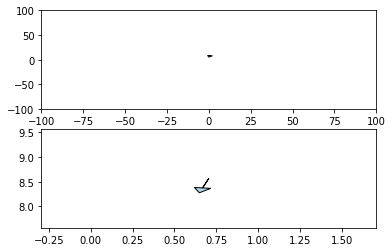

In [20]:



figure, axis = plt.subplots(2, 1)


axis[0].arrow(res_bi[1]['x_bi_ezra'], res_bi[1]['y_bi_ezra'], res_delta[1]['x_ezra'], res_delta[1]['y_ezra'], head_width=3, head_length=3, fc='lightblue', ec='black')

axis[0].set_xlim([-100,100])
axis[0].set_ylim([-100,100])


axis[1].arrow(res_bi[1]['x_bi_ezra'], res_bi[1]['y_bi_ezra'], res_delta[1]['x_ezra'], res_delta[1]['y_ezra'], head_width=0.1, head_length=0.1, fc='lightblue', ec='black')

axis[1].set_xlim([res_bi[1]['x_bi_ezra']-1,res_bi[1]['x_bi_ezra']+1])
axis[1].set_ylim([res_bi[1]['y_bi_ezra']-1,res_bi[1]['y_bi_ezra']+1])


plt.show()


In [21]:
# Starting from the area per channel we just computed the positions of the events with linposfit!

res_bi = pd.DataFrame(res_bi)
res_po = pd.DataFrame(res_po)
res_po

,x_po_ezra,y_po_ezra,r0_po_ezra,gamma_po_ezra,logl_po_ezra,n_po_ezra,x00_po_ezra,y00_po_ezra,idx_po_ezra,R_po_ez
0,20.730042,-41.040160,89671.033957,19.541293,542.240728,248,20.636855,-41.304663,0,45.978575
1,0.667833,8.373521,88033.837021,19.862004,427.064969,248,0.350982,7.879578,1,8.400111
2,-14.524156,-26.960788,83736.132724,16.996247,473.493695,248,-14.275767,-26.176944,2,30.624095
3,52.766864,-22.307903,86576.024719,17.300156,404.689177,248,51.362900,-21.489526,3,57.288607
4,1.087515,-4.941616,80893.672253,16.529259,333.317754,248,0.824502,-5.447565,4,5.059867
...,...,...,...,...,...,...,...,...,...,...
6647,37.382832,-15.594794,72917.611125,16.314603,478.632517,248,37.349767,-13.912555,6647,40.505231
6648,19.398380,-3.243119,65485.400420,14.031511,378.625832,248,19.247915,-3.402115,6648,19.667612
6649,55.296055,3.122246,91956.036932,18.419045,433.493553,248,53.670486,2.408214,6649,55.384133
6650,6.322549,2.000054,70331.535639,16.597732,354.184557,248,6.367991,2.798611,6650,6.631353


### How does LinPosFit compute the position?

We have a spectific function to plot that, you find it in the LinPosFit code. You can modify it and make it nicer!

[ 2.06226061e+01 -4.10433361e+01  7.09294348e+05  1.01841784e+03
  2.48000000e+02  1.50087320e+02  1.35994247e+07]
0.066 2000


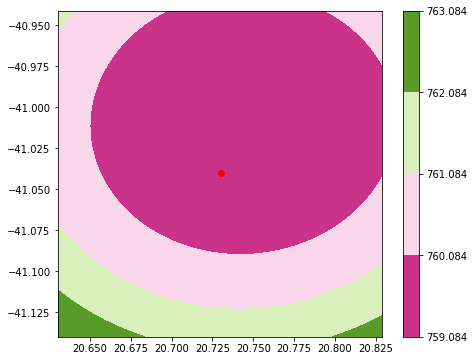

In [77]:
# Let's see how it goes for the first event
importlib.reload(LinPosFit)

nhit_bi = df_area_per_channel['s2_area_per_channel_bi'][0][:npmt_top_array]
nhit_po = df_area_per_channel['s2_area_per_channel_po'][0][:npmt_top_array]

fit_result_bi, xiter_bi, used_hits_bi = LinPosFit.lpf_execute(pmt_pos,nhit_bi,pmt_surface)
fit_result_po, xiter_po, used_hits_po = LinPosFit.lpf_execute(pmt_pos,nhit_po,pmt_surface)
print(fit_result_bi)

LinPosFit.lpf_event_display_ez_1d("2d",pmt_pos, nhit_po, fit_result_po, used_hits_po, xiter_po, range=((-66.,66.),(-66,66)))#, zoom=1)



There is also a nice function from straxen to plot the area per channel. 

What is this area per channel? What does it mean? How Do we compute position reconstruction from it?

What are the two arrays? Which one is used to compute positions? Why?

In [ ]:
nhit = df_area_per_channel['s2_area_per_channel_bi'][0]
straxen.plot_pmts(nhit)

In [ ]:
nhit_bi = df_area_per_channel['s2_area_per_channel_bi'][0][:npmt_top_array]

LinPosFit.lpf_event_display(pmt_pos, nhit_bi, fit_result_bi, used_hits_bi, xiter_bi, range=((-100.,100.),(-100,100)), zoom=2)